```
# import packages
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# clear the output 
import warnings
warnings.filterwarnings('ignore')

# Gathering and Preparing Data
ticker="2330.TW"
start = dt.datetime(2016, 1, 1)
end = dt.datetime.today()

data = yf.download(ticker, start=start, end=end)
look_forward_days = 10
data['Future Price'] = data['Close'].shift(-look_forward_days)
data['Target'] = (data['Future Price'] > data['Close'] * 1.10).astype(int)
data.dropna(inplace=True)
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Modeling, data spliting, training/fitting, back testing
X = data[features]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

# Feature Importance and Analysis
feature_importance = np.abs(model.coef_[0])
indices = np.argsort(feature_importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Model Fine-tuning
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Visualization and Results Analysis
plt.plot(scores)
plt.title('Model Accuracy Across 5-Fold Cross-Validation')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.show()
```

In [9]:
# import packages
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt

In [2]:
# clear the output 
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Gathering and Preparing Data
ticker="2330.TW"
start = dt.datetime(2016, 1, 1)
end = dt.datetime.today()

data = yf.download(ticker, start=start, end=end)
look_forward_days = 10
data['Volume']=data['Volume']//1000
data['Future Price'] = data['Close'].shift(-look_forward_days)
data['Target'] = (data['Future Price'] > data['Close'] * 1.10).astype(int)
data.dropna(inplace=True)
features = ['Open', 'High', 'Low', 'Close', 'Volume']

[*********************100%%**********************]  1 of 1 completed


In [49]:
# Modeling, data spliting, training/fitting, back testing
X = data[features]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = LogisticRegression()
model.fit(X_train, y_train)

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)


Cross-validated scores: [0.95739348 0.95739348 0.95488722 0.94486216 0.95488722]


In [57]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.3f}")

Model accuracy: 0.947


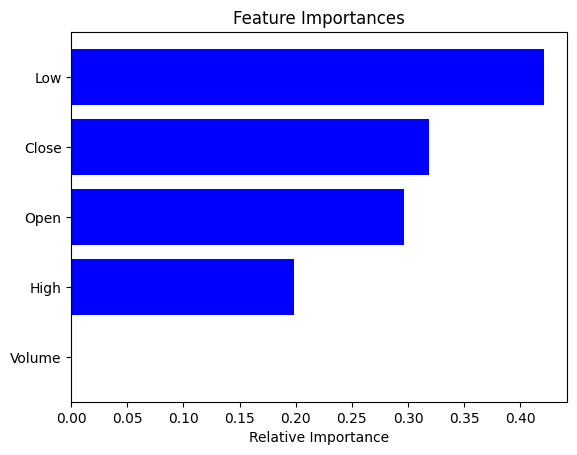

In [58]:
# Feature Importance and Analysis
feature_importance = np.abs(model.coef_[0])
indices = np.argsort(feature_importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [59]:
# Model Fine-tuning
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 100, 'solver': 'lbfgs'}


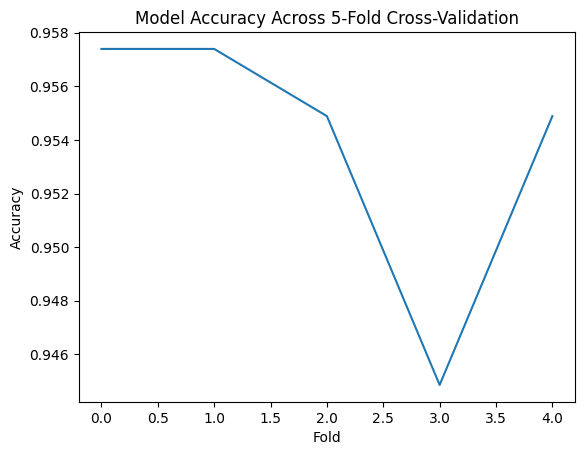

In [60]:
# Visualization and Results Analysis
plt.plot(scores)
plt.title('Model Accuracy Across 5-Fold Cross-Validation')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.show()

In [70]:
# Split the data into train and test sets using time series split
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [71]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated scores: {scores}")


Cross-validated scores: [0.95739348 0.95739348 0.95488722 0.94486216 0.95488722]


In [73]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

Model accuracy: 0.9036144578313253


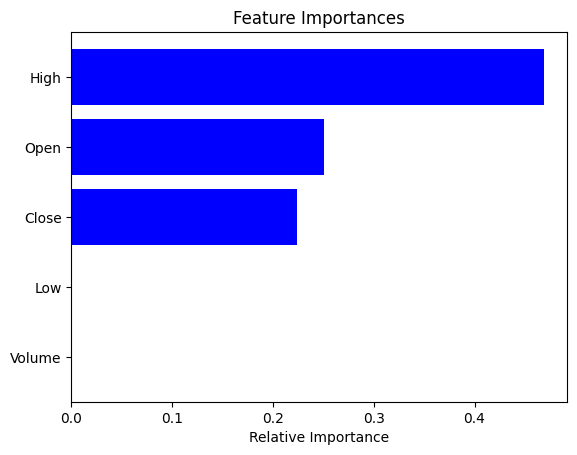

In [74]:
# Feature Importance and Analysis
feature_importance = np.abs(model.coef_[0])
indices = np.argsort(feature_importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [75]:
# Model Fine-tuning
param_grid = {'C': [0.01,0,1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}

from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

grid_search = GridSearchCV(model, param_grid, cv=tscv)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 0.01, 'solver': 'lbfgs'}


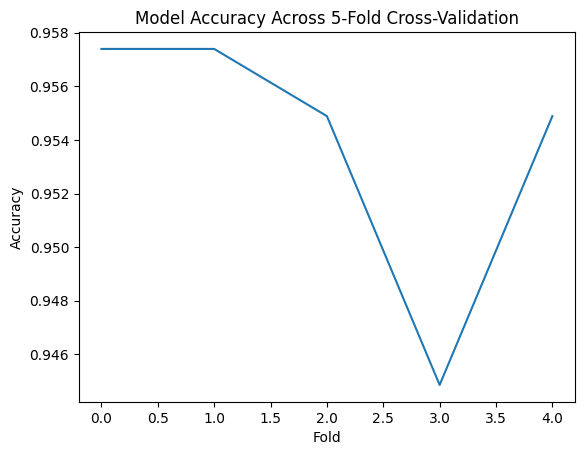

In [76]:
# Visualization and Results Analysis
plt.plot(scores)
plt.title('Model Accuracy Across 5-Fold Cross-Validation')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.show()

In [77]:
X_test

,Open,High,Low,Close,Volume
Date,,,,,
2022-11-01,388.5,393.0,386.0,391.5,41426
2022-11-02,391.0,395.0,388.5,395.0,22535
2022-11-03,385.0,387.0,383.5,384.0,39731
2022-11-04,381.0,384.5,378.5,382.0,28397
2022-11-07,390.0,393.0,387.0,390.0,35387
...,...,...,...,...,...
2024-03-14,779.0,785.0,770.0,784.0,42010
2024-03-15,771.0,777.0,753.0,753.0,73316
2024-03-18,754.0,765.0,754.0,764.0,43589


In [41]:
# Make predictions for the next few weeks
last_date = data.index[-1]
next_week_start = last_date + dt.timedelta(days=1)
next_week_end = next_week_start + dt.timedelta(days=7)

In [44]:
next_week_data = yf.download(ticker, start=next_week_start, end=next_week_end)
next_week_X = next_week_data[features]

# Use the best model to predict on the next week's data
best_model = grid_search.best_estimator_
next_week_y_pred = best_model.predict(next_week_X)

print("Predictions for the next week:", next_week_y_pred)

[*********************100%%**********************]  1 of 1 completed
Predictions for the next week: [0 0 0 0 0]


[*********************100%%**********************]  1 of 1 completed
Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
[*********************100%%**********************]  1 of 1 completed


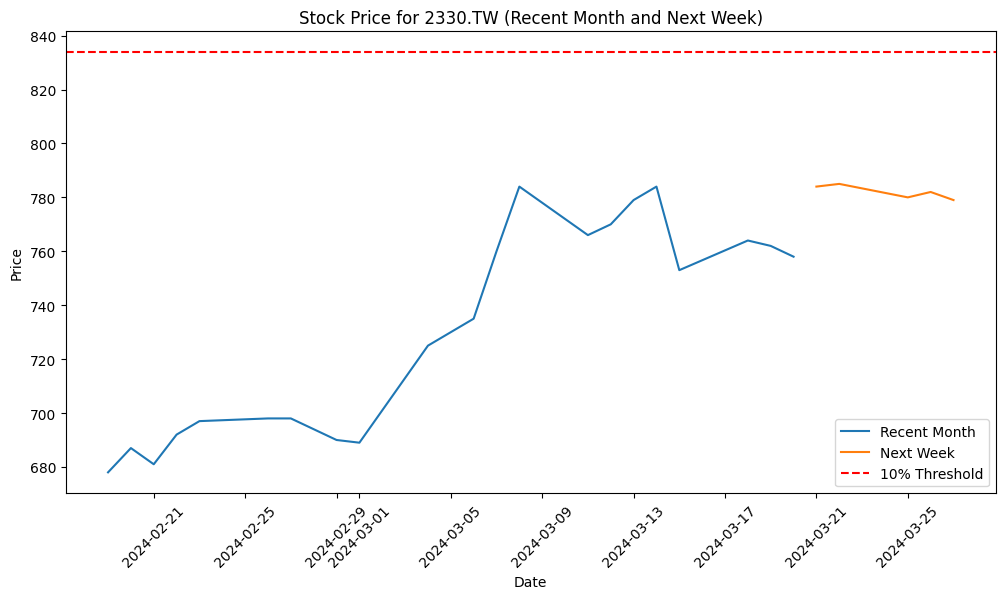

In [47]:
import matplotlib.pyplot as plt

# Gather and prepare the data
ticker = "2330.TW"
start = dt.datetime(2016, 1, 1)
end = dt.datetime.today()
data = yf.download(ticker, start=start, end=end)

look_forward_days = 10
data['Future Price'] = data['Close'].shift(-look_forward_days)
data['Target'] = (data['Future Price'] > data['Close'] * 1.10).astype(int)
data.dropna(inplace=True)

features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = data[features]
y = data['Target']

# Perform grid search with time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=tscv)
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

# Make predictions for the next week
last_date = data.index[-1]
next_week_start = last_date + dt.timedelta(days=1)
next_week_end = next_week_start + dt.timedelta(days=7)

next_week_data = yf.download(ticker, start=next_week_start, end=next_week_end)
next_week_X = next_week_data[features]
best_model = grid_search.best_estimator_
next_week_y_pred = best_model.predict(next_week_X)

# Visualize the recent month's data and the predictions
recent_month = data.loc[data.index >= (last_date - dt.timedelta(days=30))]

plt.figure(figsize=(12, 6))
plt.plot(recent_month.index, recent_month['Close'], label='Recent Month')
plt.plot(next_week_data.index, next_week_data['Close'], label='Next Week')
#plt.axhline(y=next_week_data['Close'].values * 1.10, color='r', linestyle='--', label='10% Threshold')
plt.axhline(y=recent_month['Close'].values[-1] * 1.10, color='r', linestyle='--', label='10% Threshold')

plt.title(f"Stock Price for {ticker} (Recent Month and Next Week)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:

# Modeling, data splitting, training/fitting, back testing
X = data[features]
y = data['Target']

# Split the data into train and test sets using growing window
from sklearn.model_selection import train_test_split
n = len(X)
test_size = 0.2
split_idx = int(n * (1 - test_size))

for i in range(split_idx, n, 1):
    X_train = X.iloc[:i]
    y_train = y.iloc[:i]
    X_test = X.iloc[i:]
    y_test = y.iloc[i:]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-validated scores:", scores)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)